In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from astropy.io import fits
% matplotlib notebook
from skimage.color import rgb2gray
from scipy.ndimage import imread
from telescopeSim import *
from matplotlib.colors import LogNorm
from matplotlib_scalebar.scalebar import ScaleBar, _Dimension


<IPython.core.display.Javascript object>


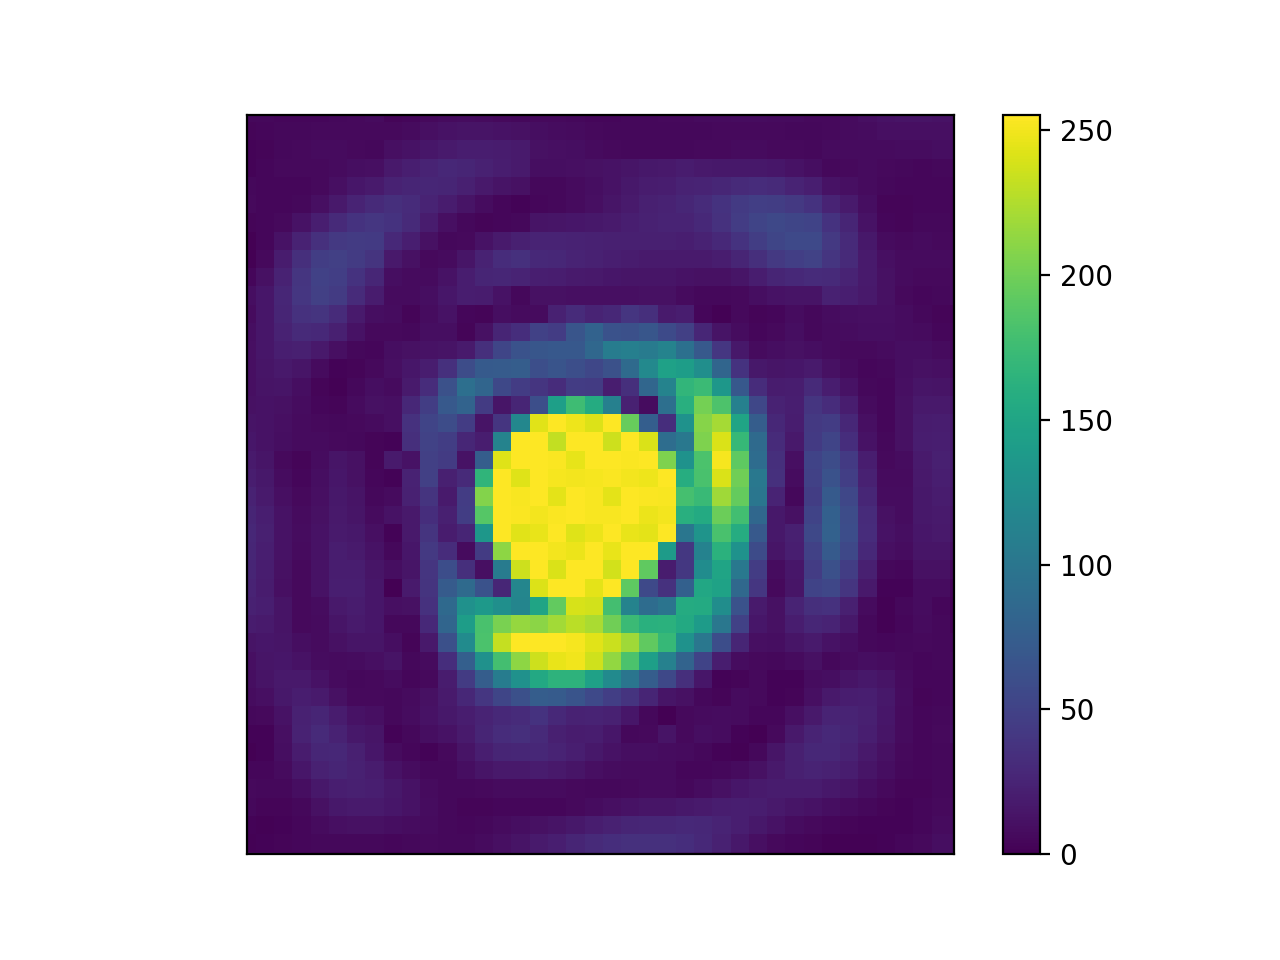

([], <a list of 0 Text yticklabel objects>)

In [25]:
PSF = imread("/Users/patapisp/Documents/DAC/ZIMPOL_Mask/Data/ZIMPOL_PSF/PSFVLT_2018-05-29-171649-0000.jpg", flatten=True)
PSF = PSF[420:520, 720:840]
plt.imshow(PSF, interpolation=None)
plt.colorbar()
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


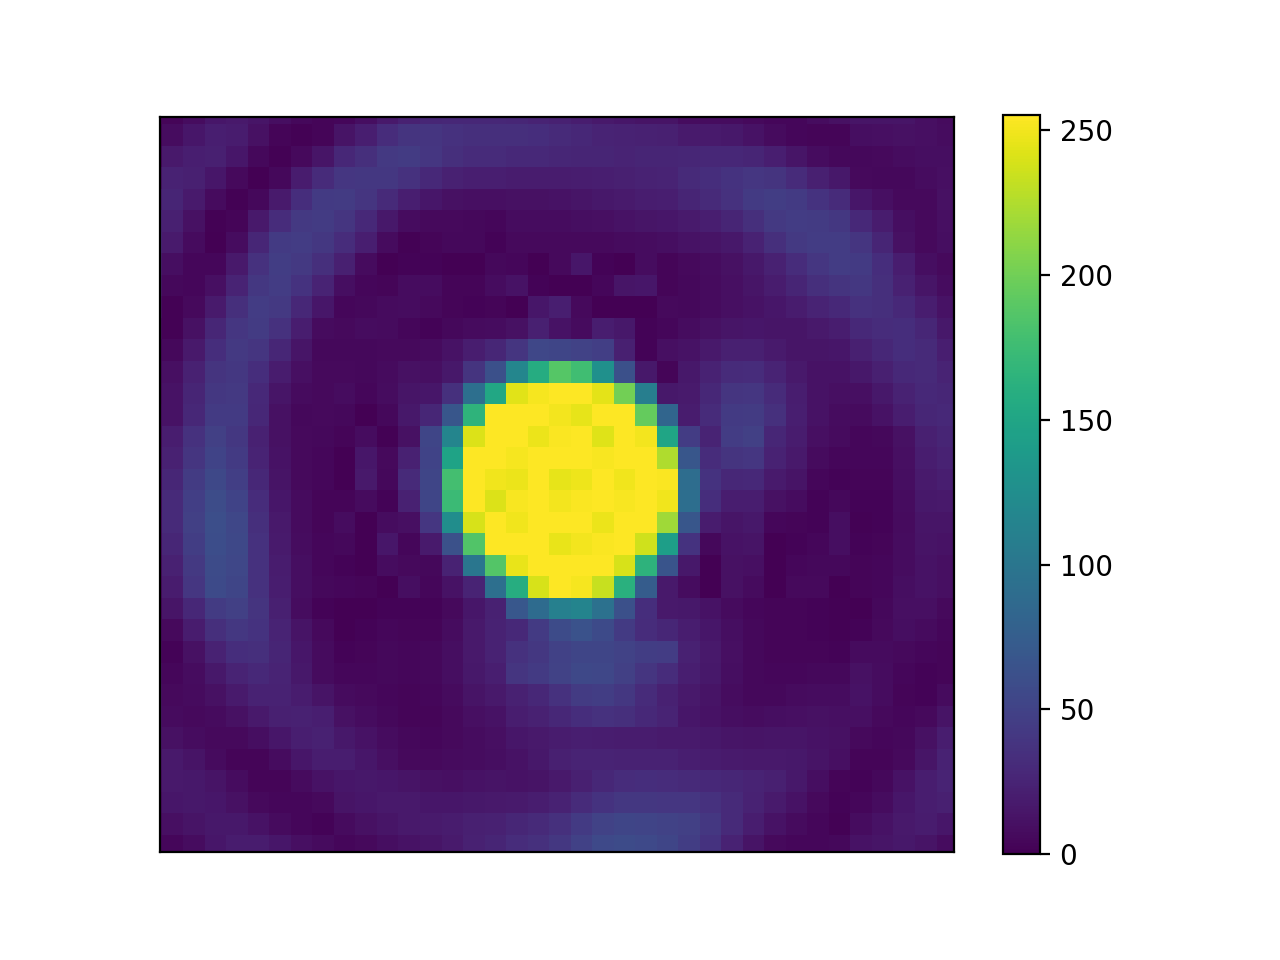

([], <a list of 0 Text yticklabel objects>)

In [27]:
PSF = imread("/Users/patapisp/Documents/DAC/ZIMPOL_Mask/Data/ZIMPOL_PSF/PSFoptZIMPOL_2018-05-29-171858-0000.jpg", flatten=True)
PSF = PSF[420:520, 720:840]
plt.imshow(PSF, interpolation=None)
plt.colorbar()
plt.xticks([])
plt.yticks([])

## Cubes, simple coadding

In [2]:
path = "/Users/patapisp/Documents/DAC/ZIMPOL_Mask/Data/Data010618_ZIMPOLmask/"

In [7]:
darkfiles = [os.path.join(path+"Darks/", f) for f in os.listdir(path+"Darks/")]
PSFfiles = [os.path.join(path+"VLT/", f) for f in os.listdir(path+"VLT/")]
PSFoptfiles = [os.path.join(path+"ZIMPOLRing/", f) for f in os.listdir(path+"ZIMPOLRing/")]
print(PSFfiles[0])

/Users/patapisp/Documents/DAC/ZIMPOL_Mask/Data/Data010618_ZIMPOLmask/VLT/PSF_VLT_-1,093EV_2018-06-01-131357-0044.bmp


<IPython.core.display.Javascript object>


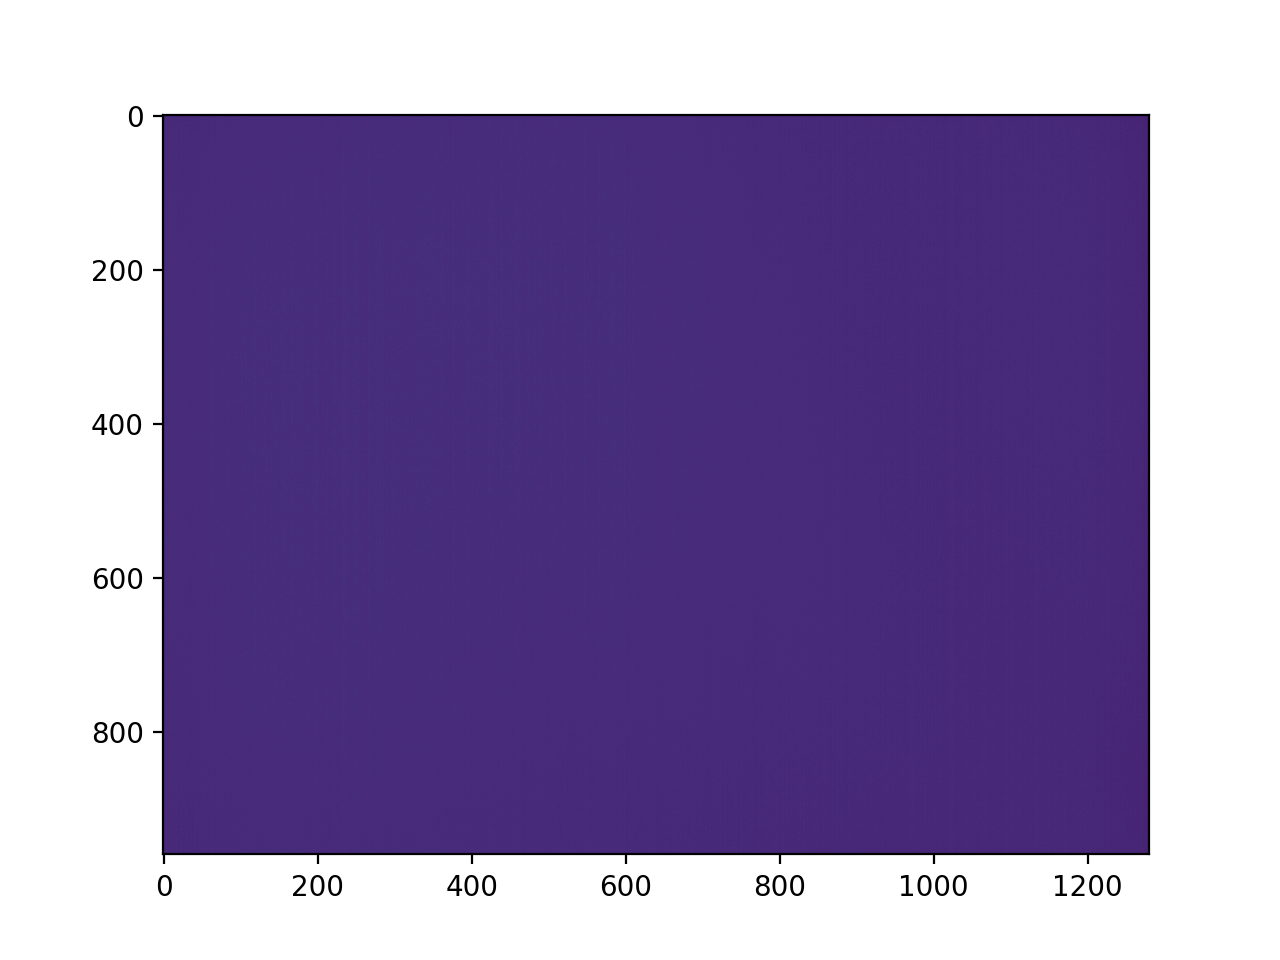

In [9]:
dark = np.median([imread(f, flatten=True) for f in darkfiles], axis=0)
plt.imshow(dark)

<IPython.core.display.Javascript object>


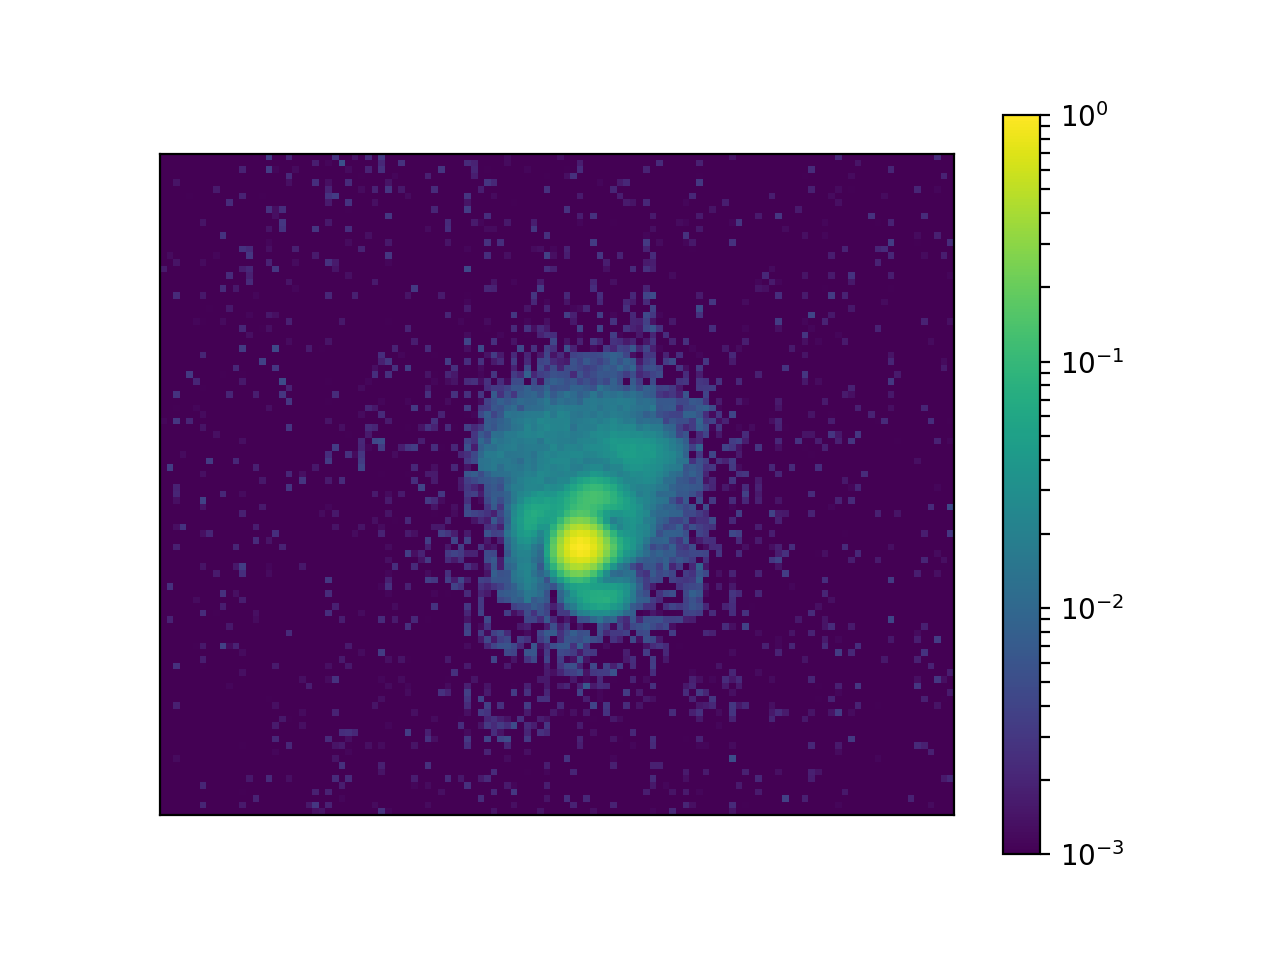

([], <a list of 0 Text yticklabel objects>)

In [27]:
PSF = 0
for f in PSFfiles:
    PSF += imread(f, flatten=True) - dark
PSF = PSF[420:520, 720:840]
PSF[np.where(PSF<=0)]= 1
calib = np.max(PSF)
PSF/=calib
plt.imshow(PSF, interpolation=None, norm=LogNorm(), vmin=10**(-3))
plt.colorbar()
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


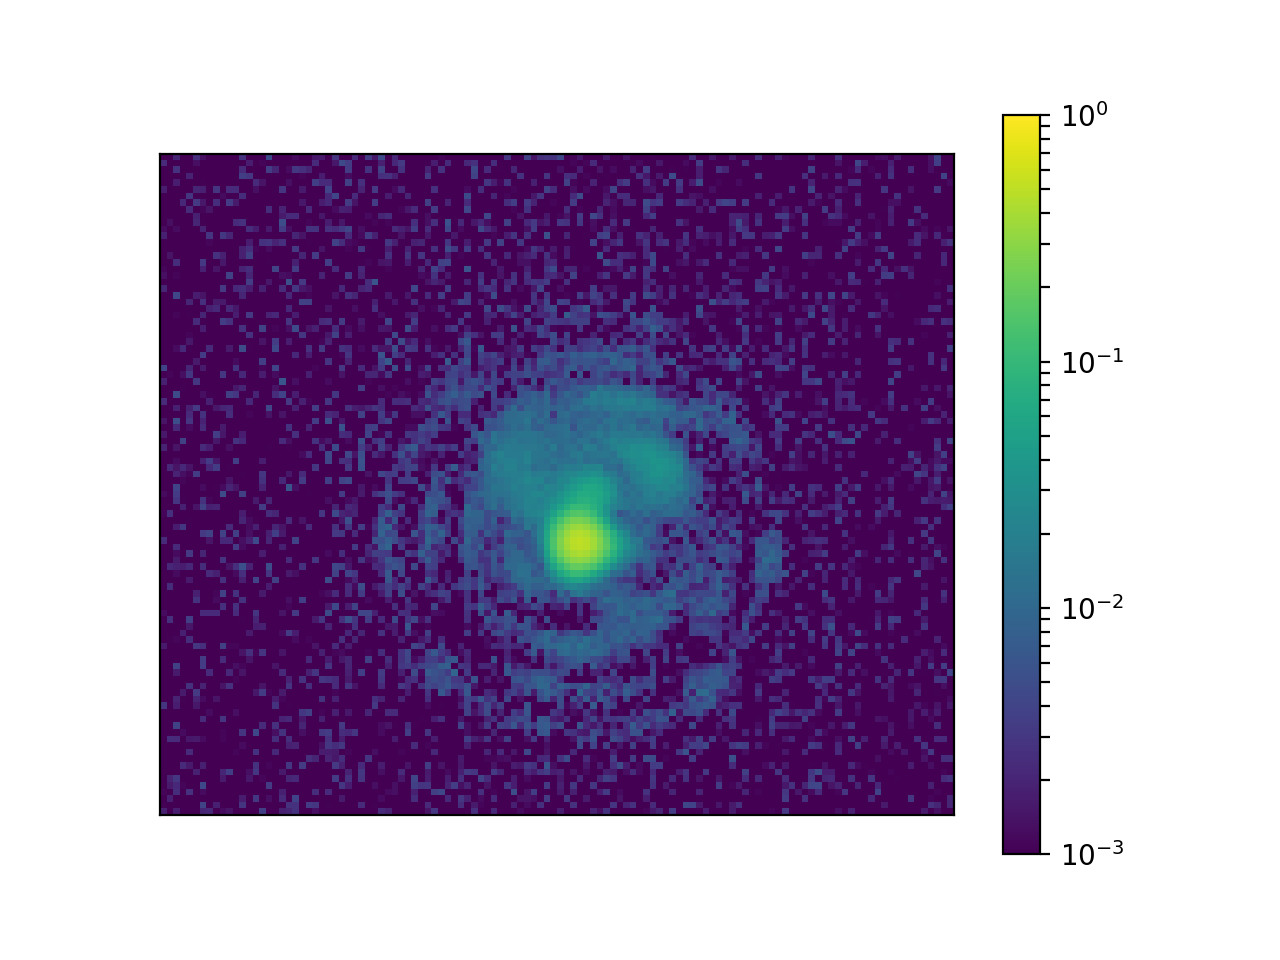

([], <a list of 0 Text yticklabel objects>)

In [28]:
PSFopt = 0
for f in PSFoptfiles:
    PSFopt += imread(f, flatten=True) - dark
PSFopt = PSFopt[420:520, 720:840]
PSFopt[np.where(PSFopt<=0)]= 1
PSFopt /= calib
plt.imshow(PSFopt, interpolation=None, norm=LogNorm(), vmax=1, vmin=10**(-3))
plt.colorbar()
plt.xticks([])
plt.yticks([])

# HCI Lab

In [2]:
path = '/Users/patapisp/Documents/DAC/ZIMPOL_Mask/Data/HCI_Lab/'

In [3]:

PSF = fits.getdata(path+'Data080618/PSF_VLT_200ms.fits')
PSFopt = fits.getdata(path+'Data080618/PSF_optMask_500us.fits')
PSFopt2 = fits.getdata(path+'Data080618/PSF_optMask+VLT_500us.fits')

dark200 = fits.getdata(path+'Dark_200us.fits')
dark500 = fits.getdata(path+'Dark_500us.fits')

dark200 = np.median(dark200, axis=0)
dark500 = np.median(dark500, axis=0)

PSF = PSF - dark200
PSFopt = PSFopt - dark500
PSFopt2 = PSFopt2 - dark500

PSF = np.median(PSF, axis=0)
PSFopt = np.median(PSFopt, axis=0)
PSFopt2 = np.median(PSFopt2, axis=0)

PSF = PSF[558:658,508:608]
PSFopt = PSFopt[558:658,508:608]
PSFopt2 = PSFopt2[558:658,508:608]

calib = np.max(PSF)
PSF /= calib
PSFopt /= calib*2.5
PSFopt2 /= calib*2.5

<IPython.core.display.Javascript object>


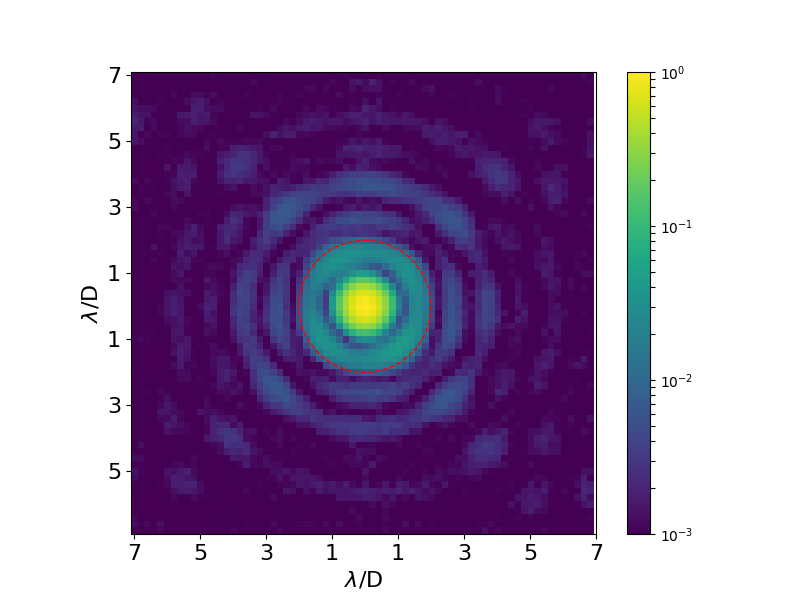

(array([ 0, 10, 20, 30, 40, 50, 60]), <a list of 7 Text yticklabel objects>)

In [5]:
plot_im_ld(PSF+7e-4,ld=5,w=7, log_scale=True,log_min=-3)
plt.xlabel("$\lambda$/D", fontsize=16)
plt.ylabel("$\lambda$/D", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig(savepath+"PSF_VLTlab.pdf",dpi=500, format='pdf', transparent=True)

<IPython.core.display.Javascript object>


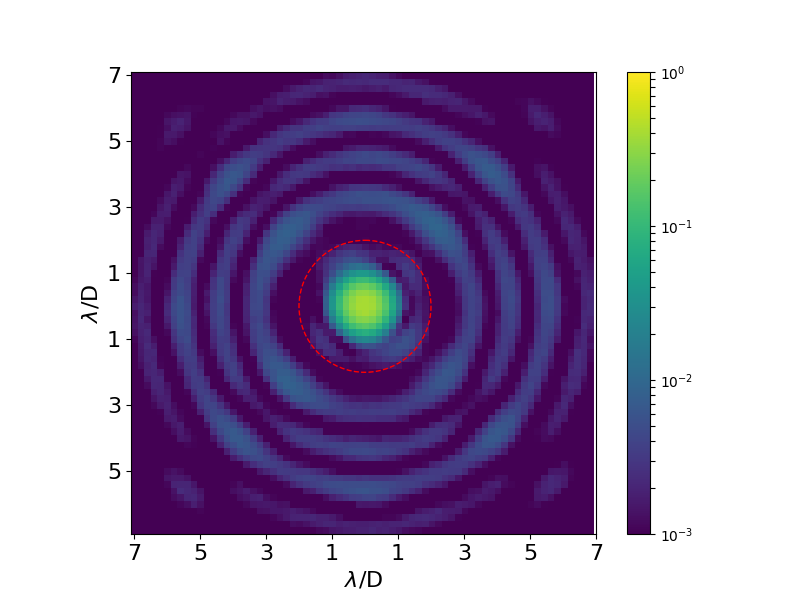

(array([ 0, 10, 20, 30, 40, 50, 60]), <a list of 7 Text yticklabel objects>)

In [6]:
plot_im_ld(PSFopt+2e-4,ld=5,w=7, log_scale=True,log_min=-3)
plt.xlabel("$\lambda$/D", fontsize=16)
plt.ylabel("$\lambda$/D", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig(savepath+"PSF_optimizedlab.pdf",dpi=500, format='pdf', transparent=True)

<IPython.core.display.Javascript object>


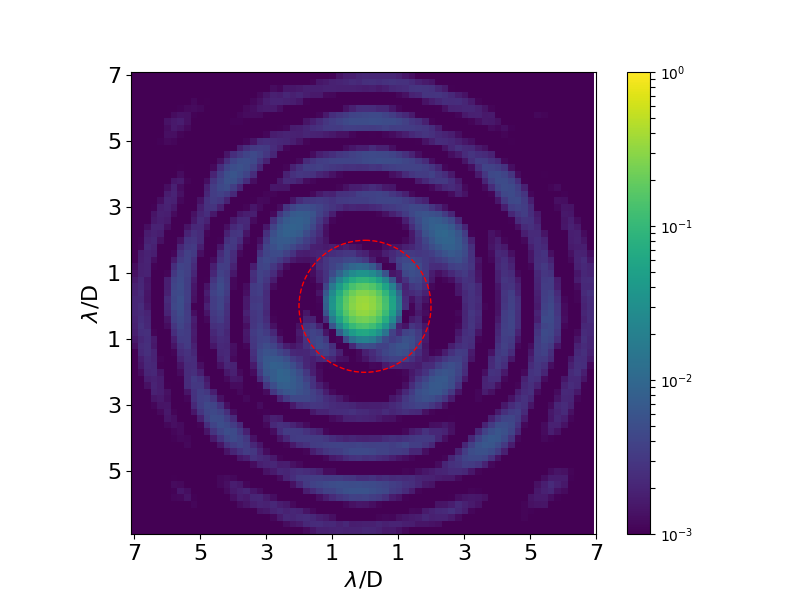

(array([ 0, 10, 20, 30, 40, 50, 60]), <a list of 7 Text yticklabel objects>)

In [7]:
plot_im_ld(PSFopt2+2e-4,ld=5,w=7, log_scale=True,log_min=-3)
plt.xlabel("$\lambda$/D", fontsize=16)
plt.ylabel("$\lambda$/D", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig(savepath+"PSF_optimized_VLTlab.pdf",dpi=500, format='pdf', transparent=True)

In [8]:
x = np.arange(-50, 50)
y = np.arange(-50, 50)
X, Y = np.meshgrid(x,y)
R, THETA = cart2pol(X, Y)

psf = [np.mean(PSF[np.where(R==r)]) for r in np.arange(0,40)]
psfopt = [np.mean(PSFopt[np.where(R==r)]) for r in np.arange(0,40)]
psfopt2 = [np.mean(PSFopt2[np.where(R==r)]) for r in np.arange(0,40)]

<IPython.core.display.Javascript object>


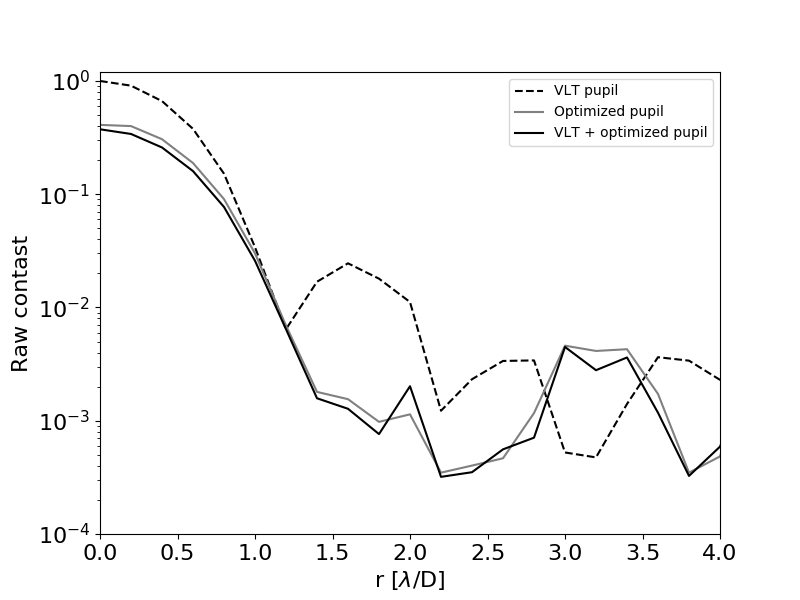

In [13]:
savepath = "/Users/patapisp/Documents/DAC/ZIMPOL_Mask/SPIE_paper/"
r = np.arange(len(psf))/5
plt.figure(figsize=(8,6))
plt.semilogy(r, psf, linestyle='--',color='black', label='VLT pupil')
plt.semilogy(r, psfopt, color='gray', label='Optimized pupil')
plt.semilogy(r, psfopt2, color='black', label='VLT + optimized pupil')
plt.xlabel("r [$\lambda$/D]", fontsize=16)
plt.ylabel("Raw contast", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([1E-4, 1.2])
plt.xlim([0, 4])
plt.legend()
plt.savefig(savepath+"Rawcontrast_measured_bothmasks.pdf",dpi=300, format='pdf', transparent=True)

204


/Users/patapisp/polybox/MasterProject/code/pupil_masks.py:124: RuntimeWarning: overflow encountered in power
  VLTpupil = (np.exp(-(Rho/apRad)**1000) - np.exp(-(Rho/Rin)**200))


<IPython.core.display.Javascript object>


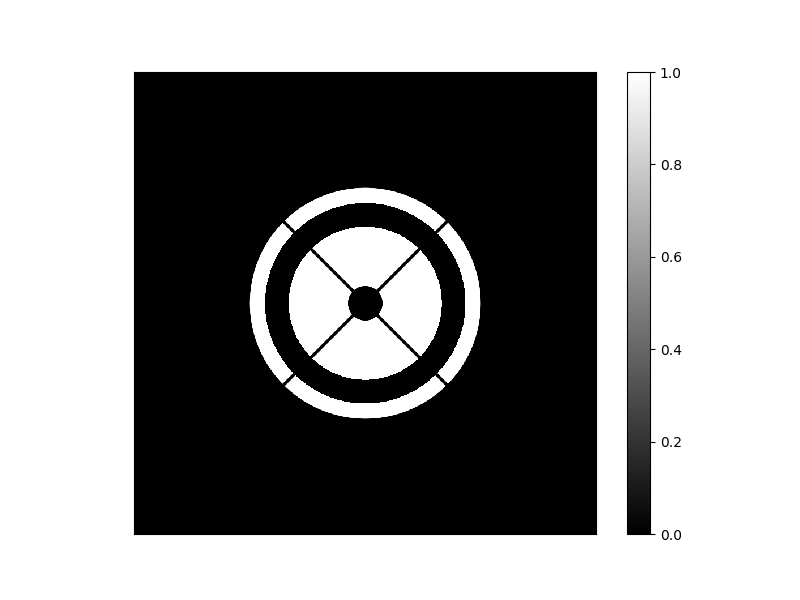

([], <a list of 0 Text xticklabel objects>)

In [2]:
lD = 10
apRad = int(N/(2*lD))
print(apRad)
EP = make_VLT_pupil(1024, apRad, spiders=False)
x = np.arange(-512, 512)
y = np.arange(-512, 512)
XX, YY = np.meshgrid(x,y)

X,Y = np.meshgrid(np.arange(-N/2, N/2),np.arange(-N/2, N/2))
RHO, THETA = cart2pol(X,Y)
Rho, Theta = cart2pol(XX, YY)

a,b = 0.765, 0.205
EPopt = EP.copy()
spWidth = 0.02
EPopt[np.where((Rho>(a-0.5*b)*apRad) & (Rho<(a+0.5*b)*apRad))]=0
EPopt *= (1 - np.exp(-((XX+YY)/(spWidth*apRad))**10))*(1 - np.exp(-((XX-YY)/(spWidth*apRad))**10))
EP = np.lib.pad(EP, (1536, 1536), 'constant', constant_values=(0,0))
EPopt = np.lib.pad(EPopt, (1536, 1536), 'constant', constant_values=(0,0))
plot_im_LP(EPopt, apRad, 1)
plt.yticks([])
plt.xticks([])

<IPython.core.display.Javascript object>


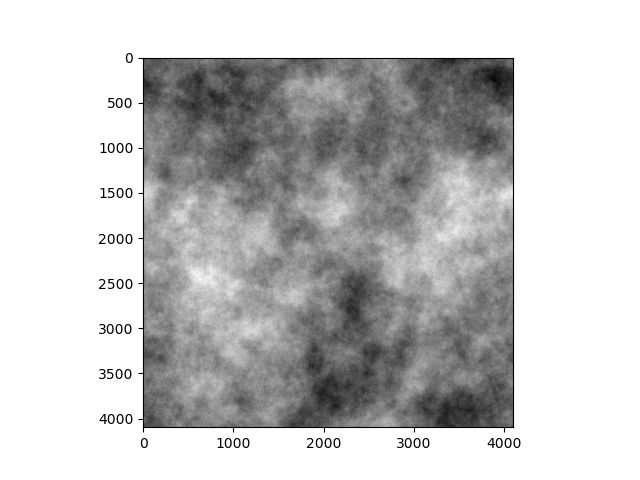

In [3]:
wf = gaussian_random_field(size=N)
plt.imshow(wf, cmap='gray')

In [5]:
sigma  = np.sqrt(np.log(1/0.9))

In [6]:
PSFth = np.abs(myfft2(EP*np.exp(1j*wf*sigma)))**2
calib = np.max(PSFth)
PSFth /= calib
PSFoptth = np.abs(myfft2(EPopt*np.exp(1j*wf*sigma)))**2
PSFoptth /= calib

start = 2048
end = 2088
psfth = np.array([np.median(PSFth[np.where(RHO == r)]) for r in np.arange(0,80)])
psfoptth = np.array([np.median(PSFoptth[np.where(RHO == r)]) for r in np.arange(0,80)])
r2 = np.arange(0,80)/10

<IPython.core.display.Javascript object>


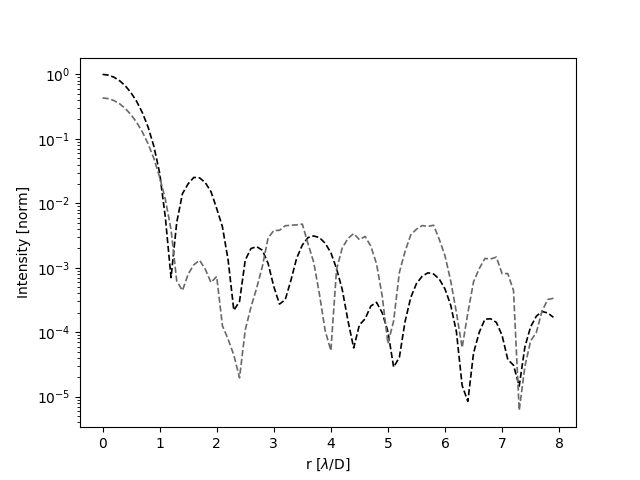

In [7]:
plt.semilogy(r2, psfth,linestyle='--',linewidth=1.2, color='black',alpha=1, label="PSF theory")
plt.semilogy(r2, psfoptth,'dimgray', linestyle='--',linewidth=1.2, alpha=1, label="Optimized theory")
plt.xlabel("r [$\lambda$/D]")
plt.ylabel("Intensity [norm]")

In [8]:
OPT_REG_FP = np.zeros((1024,1024))
OPT_REG_FP[np.where(Rho<2.5*lD)] = 1
OPT_REG_FP[np.where(Rho<1.5*lD)] = 0
OPT_REG_FP = np.lib.pad(OPT_REG_FP, (1536, 1536), 'constant', constant_values=(0,0))

In [10]:
1/(np.sum(PSFoptth[OPT_REG_FP==1])/np.sum(PSFth[OPT_REG_FP==1]))

13.361958065859005

<IPython.core.display.Javascript object>


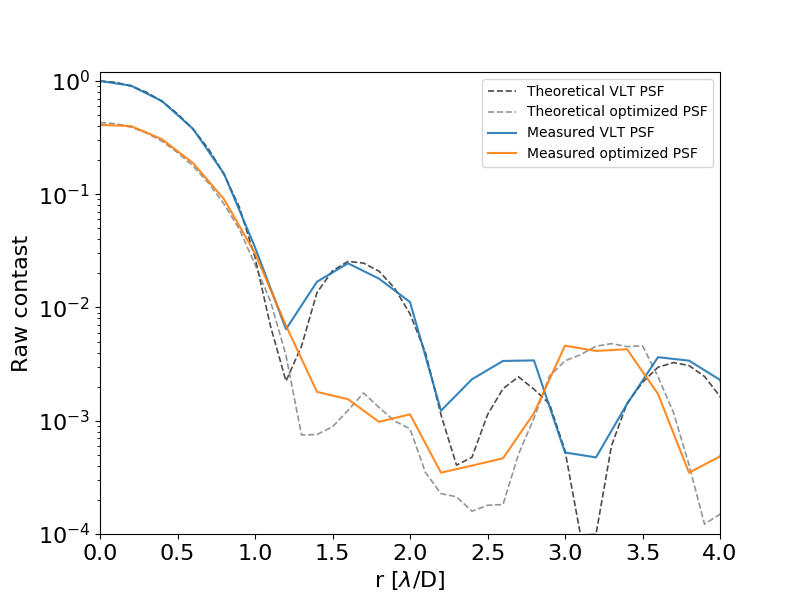

In [14]:
savepath = "/Users/patapisp/Documents/DAC/ZIMPOL_Mask/SPIE_paper/"
plt.figure(figsize=(8,6))
plt.semilogy(r2, psfth,linestyle='--',linewidth=1.2, color='black',alpha=.7, label="Theoretical VLT PSF")
plt.semilogy(r2, psfoptth,'dimgray', linestyle='--',linewidth=1.2, alpha=.7, label="Theoretical optimized PSF")
r = np.arange(len(psf))/5

plt.semilogy(r, psf, label='Measured VLT PSF', alpha=.9)
plt.semilogy(r, psfopt, label='Measured optimized PSF', alpha=.9)
#plt.semilogy(r, psfopt2, color='darkgray', label='Both')
plt.xlabel("r [$\lambda$/D]", fontsize=16)
plt.ylabel("Raw contast", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([1E-4, 1.2])
plt.xlim([0, 4])
plt.legend()
plt.savefig(savepath+"Rawcontrast_measured_theoretical.pdf",dpi=300, format='pdf', transparent=True)

In [29]:
1/(np.sum(PSFopt[np.where((R<2.5*5) & (R>1.5*5))])/np.sum(PSF[np.where((R<2.5*5) & (R>1.5*5))]))

10.560718711276332

In [30]:
OPT_REG_FP = np.zeros((1024,1024))
OPT_REG_FP[np.where(Rho<2.5*lD)] = 1
OPT_REG_FP[np.where(Rho<1.5*lD)] = 0
OPT_REG_FP = np.lib.pad(OPT_REG_FP, (1536, 1536), 'constant', constant_values=(0,0))

1/(np.sum(PSFoptth[OPT_REG_FP==1])/np.sum(PSFth[OPT_REG_FP==1]))

11.13211511861694

## ZIMPOL telescope data


In [10]:
PSFreal = fits.getdata("/Users/patapisp/Documents/DAC/ZIMPOL_Mask/Data/sci1.fits")[0]
PSFreal = PSFreal[361:661, 361:661]
PSFreal /= np.max(PSFreal)

In [37]:
ld

In [35]:
ld_dim.base_units

'$\\lambda$/D'

In [42]:
LDDimension.base_units

<IPython.core.display.Javascript object>


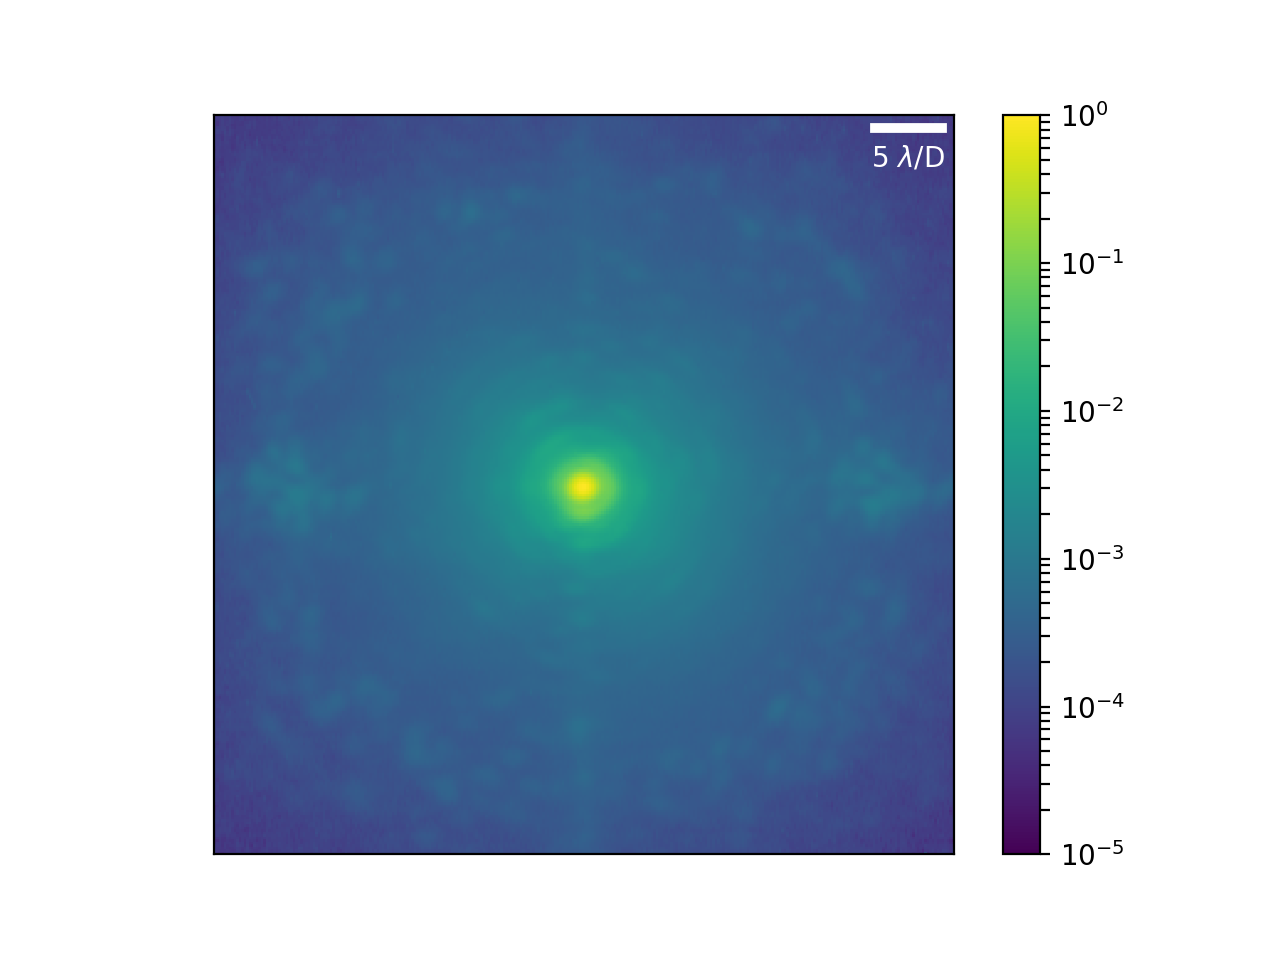

In [49]:

cax=plt.imshow(PSFreal, interpolation=None, norm=LogNorm(), vmin=1E-5)
scalebar = ScaleBar(1/6, units='lD', dimension=_Dimension('lD', latexrepr='$\lambda$/D'), box_alpha=0, color='w') 
plt.gca().add_artist(scalebar)
circ = plt.Circle((n1, n1), radius=2*6, color='red', linestyle='--', alpha=.5, fill=False)
#plt.gca().add_patch(circ)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.savefig(savepath+"PSFZIMPOLsky_big.pdf", dpi=300, format='pdf', transparent=True)

<IPython.core.display.Javascript object>


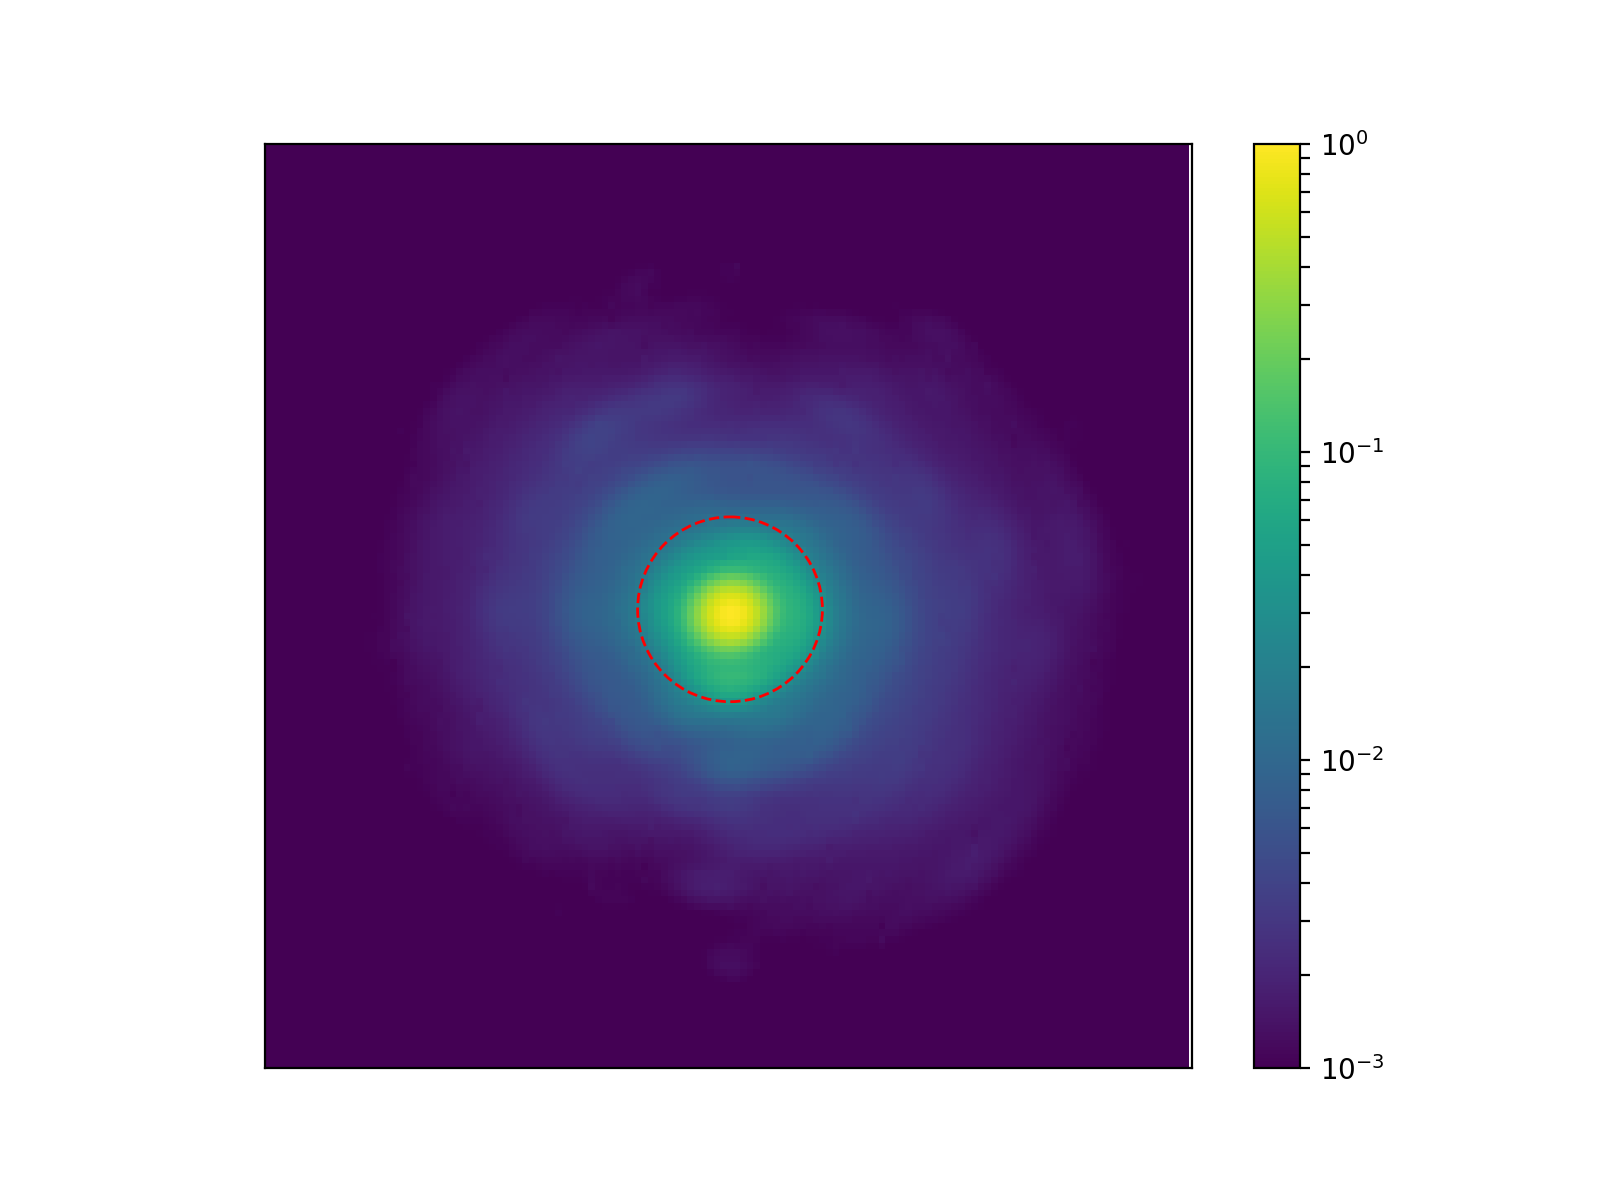

In [52]:
savepath = "/Users/patapisp/Documents/DAC/ZIMPOL_Mask/SPIE_paper/"
plot_im_ld(np.roll(PSFreal,1,axis=1),ld=7, w=10, log_scale=True, log_min=-3)

#plt.xlabel("$\lambda$/D", fontsize=16)
#plt.ylabel("$\lambda$/D", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.savefig(savepath+"PSFZIMPOLsky.pdf", dpi=300, format='pdf', transparent=True)

## Pupil images


In [4]:
VLT = fits.getdata(path+"Data080618/VLT_Pupil_100ms.fits")[0]
optMask = fits.getdata(path+"Data080618/OptMask_Pupil_150ms.fits")[0]
optMask_both = fits.getdata(path+"Data080618/Pupil_optMask+VLT_150ms.fits")[0]

In [6]:
(141-105)*0.016

0.5760000000000001

<IPython.core.display.Javascript object>


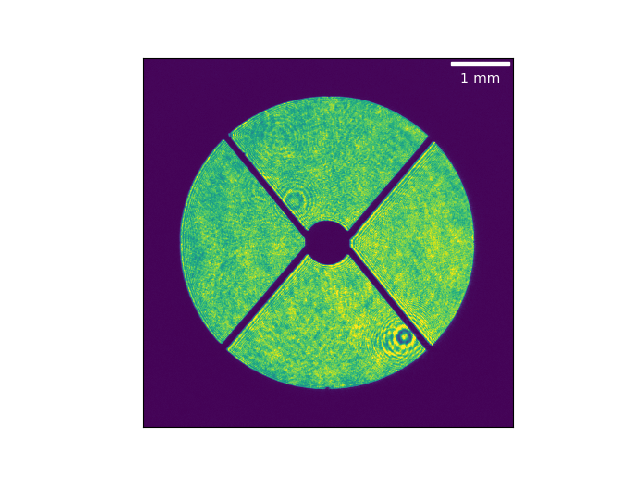

In [21]:
plt.imshow(VLT[522:922, 464:864]/np.max(VLT), vmax=.7)
plt.yticks([])
plt.xticks([])
scalebar = ScaleBar(0.016, units='mm', box_alpha=0, color='w') # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
#plt.savefig(savepath+"VLT_PUPIL_lab.pdf",dpi=300, format='pdf', transparent=True)

<IPython.core.display.Javascript object>


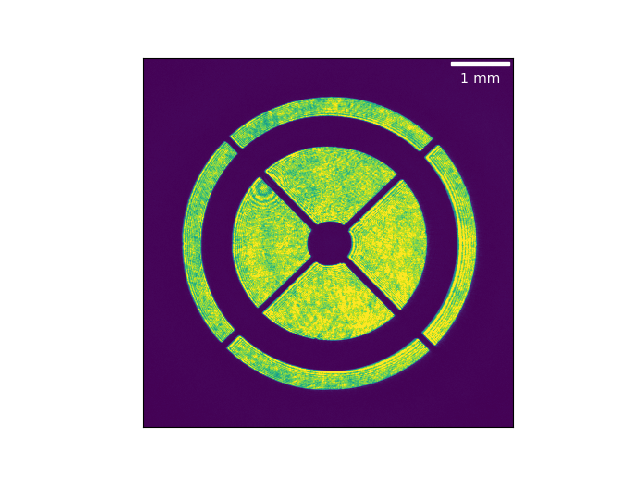

In [22]:
plt.imshow(optMask[522:922, 464:864]/np.max(optMask), vmax=.7)
plt.yticks([])
plt.xticks([])
scalebar = ScaleBar(0.016, units='mm', box_alpha=0, color='w') 
plt.gca().add_artist(scalebar)
plt.savefig(savepath+"ZIMPOLoptMask_PUPIL_lab.pdf",dpi=300, format='pdf', transparent=True)

<IPython.core.display.Javascript object>


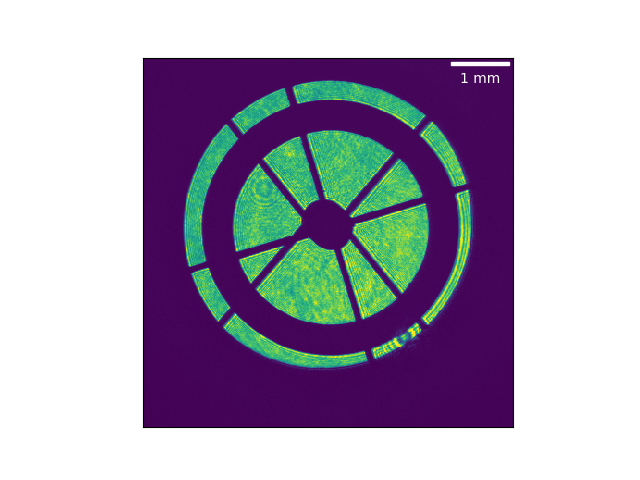

In [23]:
plt.imshow(optMask_both[522:922, 464:864]/np.max(optMask_both), vmax=.7)
plt.yticks([])
plt.xticks([])
scalebar = ScaleBar(0.016, units='mm', box_alpha=0, color='w') 
plt.gca().add_artist(scalebar)
plt.savefig(savepath+"ZIMPOLoptMask_VLT_PUPIL_lab.pdf",dpi=300, format='pdf', transparent=True)